In [2]:
import nsfg
import first
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
preg = nsfg.ReadFemPreg()

In [4]:
live, firsts, others = first.MakeFrames()

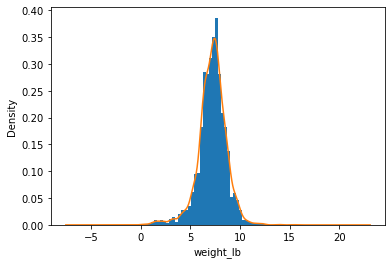

In [5]:
plt.hist(firsts.totalwgt_lb, density=True, bins=50)
firsts.totalwgt_lb.plot(kind="density")
plt.xlabel('weight_lb')
plt.show()

In [6]:
def percentile_rank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count +=1
        
    pr = 100 * count/len(scores)
    return pr

In [7]:
def percentiles(scores, percentile_rank):
    scores.sort()
    idx = int(percentile_rank * (len(scores)-1)/100)
    return scores[idx]

In [8]:
scores = [55, 66, 77, 88, 99]
percentile_rank(scores, 88)

80.0

In [9]:
percentiles(scores, 50)

77

In [10]:
def eval_cdf(t, x):
    count = 0
    for val in t:
        if val <= x:
            count += 1
    return count/len(t)

In [11]:
sample = [1, 2, 2, 3, 5]
vals = np.arange(6)
for val in vals:
    print("CDF({}) =".format(val), eval_cdf(sample, val))

CDF(0) = 0.0
CDF(1) = 0.2
CDF(2) = 0.6
CDF(3) = 0.8
CDF(4) = 0.8
CDF(5) = 1.0


Text(0, 0.5, 'CDF')

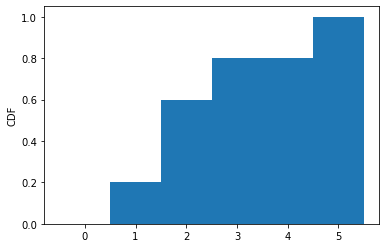

In [12]:
cdfs = [eval_cdf(sample, val) for val in vals]
plt.bar(vals, cdfs, width=1.0)
plt.ylabel('CDF')

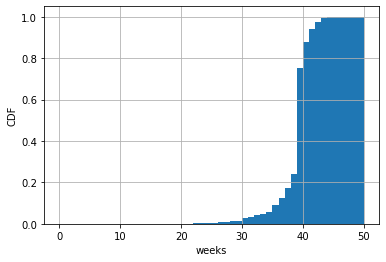

In [13]:
live.prglngth.hist(cumulative=True, density=1, bins=50)
plt.ylabel('CDF')
plt.xlabel('weeks')
plt.show()

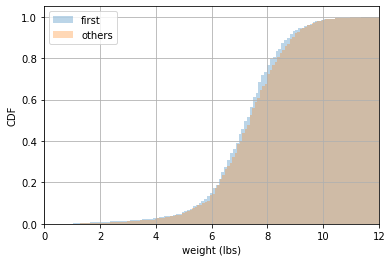

In [14]:
fig, ax = plt.subplots()
firsts.totalwgt_lb.hist(cumulative=True, density=1,
                                     bins=150, alpha=0.3, label='firsts')
others.totalwgt_lb.hist(cumulative=True, density=1,
                        bins=150, alpha=0.3, label='others')

ax.legend(["first", "others"])
ax.set_xlim([0, 12])
ax.set_xlabel('weight (lbs)')
ax.set_ylabel('CDF')
plt.show()

In [15]:
weights = live.totalwgt_lb
sample_wgts = np.random.choice(weights, 100, replace=True)
sample_wgts
# plt.hist(sample_wgts, cumulative=True, density=1, bins=10)

array([ 9.1875,  7.625 ,  7.375 ,  6.3125,  8.125 ,  7.5   ,  9.    ,
        6.875 ,  8.    ,  8.3125,  8.3125,  6.875 ,  7.    ,  7.75  ,
        7.625 ,  7.9375,  6.3125,  5.375 ,  6.5   ,  7.6875,  6.8125,
        6.5   ,  7.0625,  8.125 ,     nan,  5.25  ,  6.4375,  7.6875,
        7.375 ,  9.125 ,  6.5625,  6.1875,  0.5625,  8.5   ,  6.3125,
        7.4375,  8.6875,  7.125 ,  6.375 ,  9.375 ,  8.5625,  7.3125,
        6.8125,  6.375 ,  8.25  ,  6.25  ,  7.25  ,  8.875 ,  7.    ,
        8.1875,  8.3125,  6.6875,  8.875 ,  7.5625,  7.75  ,  7.5625,
        7.375 , 10.    ,  6.5625,  7.875 ,  8.25  ,  6.125 ,  6.1875,
        6.6875,  7.75  ,  6.5625,  7.25  ,  7.3125,  6.75  ,  7.125 ,
        8.5   ,  6.625 ,  6.    ,  7.625 ,  7.5625,  6.5   ,  6.5625,
        6.6875,  6.875 ,  8.4375,  8.4375,  5.6875,  7.5   ,  9.3125,
        6.5625,  7.75  ,  6.    ,  9.    ,  7.5   ,  6.6875,  8.4375,
        4.625 ,  6.1875,  6.3125,  8.    ,  9.875 ,  7.6875,  8.8125,
        7.75  ,  8.5

In [16]:
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')
ranks = [cdf.PercentileRank(x) for x in sample_wgts]

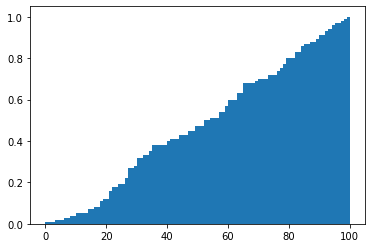

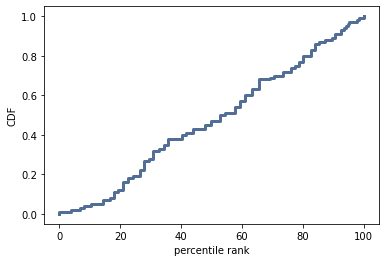

<Figure size 576x432 with 0 Axes>

In [17]:
plt.hist(ranks, cumulative=True, density=1, bins=100)
plt.show()

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

In [18]:
rand_uniform = np.random.random(1000)

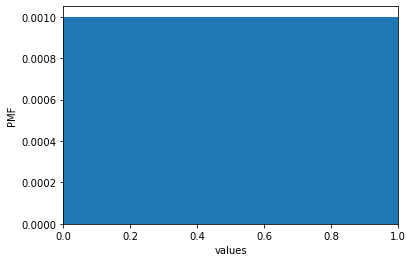

In [19]:
def get_pmf(data):
    vals, counts = np.unique(data, return_counts=True)
    pmf = counts/len(data)
    return pmf

fig = plt.figure()
plt.bar(rand_uniform, get_pmf(rand_uniform))
plt.xlabel('values')
plt.ylabel('PMF')
plt.xlim([0,1])
fig.savefig('PMF.png')


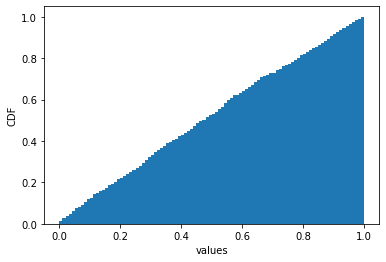

In [20]:
fig = plt.figure()
plt.hist(rand_uniform, cumulative=True, density=1, bins=100)
plt.xlabel('values')
plt.ylabel('CDF')
plt.savefig('CDF.png')

####  PMF and CDF for random uniform distribution:
* The PMF should be a straight line since they are samples from a uniform distribution. ie the probabilities associated with each value will be the same prob(x) = 1/num_samples.<br><br>
* The CDF should be a diagonal line since no value in the distribution has a greater probability than the ones that precede it.

![uniform_PMF](PMF.png)
![uniform_CDF](CDF.png)
